In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [35]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
planets.shape

(1035, 6)

In [7]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [5]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [36]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [37]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [38]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [10]:
pd.options.display.max_rows= 4000

In [11]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [39]:
decade = 10* (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [47]:
planets.pivot_table('number', index='method', columns=decade, aggfunc='sum', fill_value = 0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0,0,0,2
Eclipse Timing Variations,0,0,5,10
Imaging,0,0,29,21
Microlensing,0,0,12,15
Orbital Brightness Modulation,0,0,0,5
Pulsar Timing,0,9,1,1
Pulsation Timing Variations,0,0,1,0
Radial Velocity,1,52,475,424
Transit,0,0,64,712


In [7]:
titanic = sns.load_dataset('titanic')
titanic.head()
#:) this actually needed the internet :)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#survival rate by gender
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


So this means that 3 of 4 females survived because it's at about 75% (3rd quartile) in the survival rate and 1 of 5 males survived because its at about 20%; let's check by other metrics

In [15]:
#sorting by class, and the aggr mean for each class and resp. gender
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


this goes on to show that men & women from 1st class had a higher rate of survival than those in lower classes. 
97% for females in 1st class, 92% in 2nd class and a big drop to 50% in 3rd class
for the males 36% for first class

one in 10 third class men survived!!

In [16]:
#let's make the code above shorter and easier to read & use

titanic.pivot_table('survived', index= 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [18]:
#let's find out how it's used
#PLEASE RUN THIS FOR BETTER UNDERSTANDING
titanic.pivot_table?

#DataFrame.pivot_table(values=None, index=None, columns=None,
#    aggfunc='mean',fill_value=None, margins=False,
#    dropna=True,margins_name='All',observed=False)

#then puts the table in a dataframe

In [19]:
pd.cut?
#Use `cut` when you need to segment and sort data values into bins. This
#function is also useful for going from a continuous variable to a
#categorical variable. For example, `cut` could convert ages to groups of
#age ranges. Supports binning into an equal number of bins, or a
#pre-specified array of bins.


#qcut automatically calculates quartiles

In [24]:
age = pd.cut(titanic['age'],[0, 18, 80])
titanic.pivot_table('survived', index=['sex',age], columns = 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [29]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [31]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'], fill_value = 0)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]                 0  1.000000  0.714286          0.909091   
       (18, 80]                0  0.880000  0.444444          0.972973   
male   (0, 18]                 0  0.000000  0.260870          0.800000   
       (18, 80]                0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [33]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})
#Notice also here that we’ve omitted the values keyword; when you’re specifying a
#mapping for aggfunc, this is determined automatically.


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [34]:
#At times it’s useful to compute totals along each grouping. 
#This can be done via the margins keyword:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

#overall survival rate is 38%

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


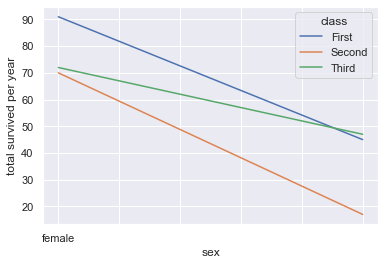

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum').plot()
plt.ylabel('total survived per year');

In [53]:
sns.set?

In [2]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [4]:
births['decade']= 10* (births['year'] //10)
births.pivot_table('births', index= 'decade', columns='gender', aggfunc = 'sum')

#calculating by the decade, how many births per gender

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


* the 'births' is the value, we take the sum of the births for each gender, making the index/rows, the 'year' and the gender, measured in the cols

Text(0, 0.5, 'total births per year')

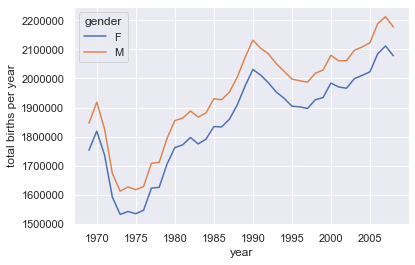

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

In [6]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [7]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [8]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [9]:
births['day']= births['day'].astype(int)
#setting the day column to int form, from a float

In [10]:
#creating a datetime index
births.index = pd.to_datetime(10000*births.year +
                             100*births.month +
                             births.day, format = '%Y%m%d')
births['dayofweek']=births.index.dayofweek
births.dayofweek

1969-01-01    2
1969-01-01    2
1969-01-02    3
1969-01-02    3
1969-01-03    4
             ..
1988-12-29    3
1988-12-30    4
1988-12-30    4
1988-12-31    5
1988-12-31    5
Name: dayofweek, Length: 14610, dtype: int64

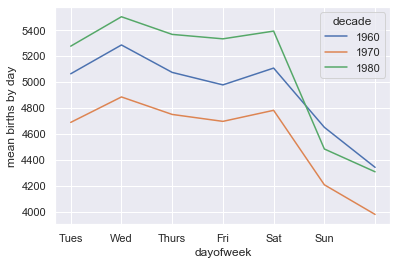

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                   columns='decade', aggfunc='mean').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

#what's showing on the y axis is the count of the births
#for each decade

In [21]:
births_by_date=births.pivot_table('births',
                                  [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [15]:
import datetime as dt

In [22]:
births_by_date.index = [pd.datetime(2012, month, day)
                          for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\Hanan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


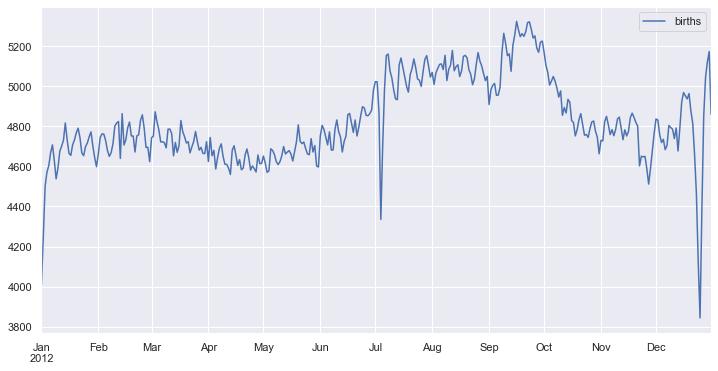

In [29]:
#plotting the into 'births_by_date' into a time series
fig, ax = plt.subplots(figsize = (12,6))
births_by_date.plot(ax=ax)

In [32]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
pd.Series(data).str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

OR --~ names = pd.Series(data)...
names.str.capitalize()

#### Pandas string methods
len() lower() translate() islower()
ljust() upper() startswith() isupper()
rjust() find() endswith() isnumeric()
center() rfind() isalnum() isdecimal()
zfill() index() isalpha() split()
strip() rindex() isdigit() rsplit()
rstrip() capitalize() isspace() partition()
lstrip() swapcase() istitle() rpartition()

In [3]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [4]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [5]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [6]:
monte.str.rsplit()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [7]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')
#find all names that either start or end with a vowel, so we can view
#just the consonants

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [8]:
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [16]:
#review this
monte.str.slice_replace(0, 'x')

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [9]:
#OR
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [10]:
#get() and slice() methods also let you access elements of arrays returned by split()
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [11]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                                    'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [12]:
full_monte['info'].str.get_dummies("|")

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [13]:
monte.str.slice_replace(0,3)

0    ham Chapman
1       n Cleese
2     ry Gilliam
3         c Idle
4       ry Jones
5     hael Palin
dtype: object

#### Time series with python

In [4]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [16]:
#Alternatively, with pandas
x = pd.to_datetime("4th of July, 2015") 
x

Timestamp('2015-07-04 00:00:00')

In [6]:
from dateutil import parser
date = parser.parse("July 4, 2015")
#with the dateutil format, i can parse a variety of str formats
date

#I think this format may have the potential to reformat any discrepancies 
#in a date data and make them uniform
#pd.to_datetime is also a good parser call. see below, below

datetime.datetime(2015, 7, 4, 0, 0)

In [11]:
#let's check which day of the week it is, in short form.
date.strftime('%a')

#this can also help us check which day of the week the dates fall on
#possibility: I think it can help create a new column containing the
#days of the week the date falls on for further and better analyses

'Sat'

In [17]:
#Alternatively, with Pandas, it works the same way:
x.strftime('%a')

'Sat'

In [12]:
date = np.array('2015-07-04', dtype=np.datetime64)
date
#Because it's ina numpy array, I can't check the info 

array('2015-07-04', dtype='datetime64[D]')

In [24]:
#with pandas, as with the cell below, in a vectorized format, 

date + pd.to_timedelta(np.arange(12), 'h')
#this shows a sequence of consecutive dates by the hour, month and year(M,Y)
#formats are no longer supported.
#unlike the numpy alt, which is in days, pandas to timdelta menthod is normally in hours.

DatetimeIndex(['2015-07-04 00:00:00', '2015-07-04 01:00:00',
               '2015-07-04 02:00:00', '2015-07-04 03:00:00',
               '2015-07-04 04:00:00', '2015-07-04 05:00:00',
               '2015-07-04 06:00:00', '2015-07-04 07:00:00',
               '2015-07-04 08:00:00', '2015-07-04 09:00:00',
               '2015-07-04 10:00:00', '2015-07-04 11:00:00'],
              dtype='datetime64[ns]', freq=None)

In [13]:
#Let's perform vectorized operations on it
date + np.arange(12)
#this means, to the former output of the 'date', 
#concat 12 subsequent days in a vectorized format/list.

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [14]:
#a day based datetime is:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [15]:
#this is a minute based datetime:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [27]:
np.datetime64('2300-07-04 12:59:59.50', 'ns')

numpy.datetime64('1715-12-14T13:25:25.790448384')

In [28]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [34]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [35]:
data.iloc[1:3]
#data from index one to three, provides index 1 and 2. Cuts off the outer call

2014-08-04    1
2015-07-04    2
dtype: int64

In [36]:
data['2015'] #show me data from 2015 only
#this works because its in a datetime frame already 

2015-07-04    2
2015-08-04    3
dtype: int64

In [37]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

* suppose you have a data with discrepancies in date format such as this, pd.to_datetime is a good parser to bring it to uniformity based on the order that's defined for your 'datetime'

In [38]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.timedelta_range(0, periods=9, freq="2H30T")

#timestamp for 9 periods at 2H 30 Mins Interval

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [8]:
import pandas as pd
from pandas_datareader import data
import numpy as np

In [10]:
goog = data.DataReader('GOOG', start='2004', end='2016', 
                       data_source='yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [11]:
goog = goog['Close']

In [12]:
 %matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

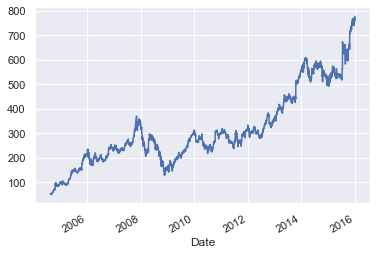

In [13]:
goog.plot()

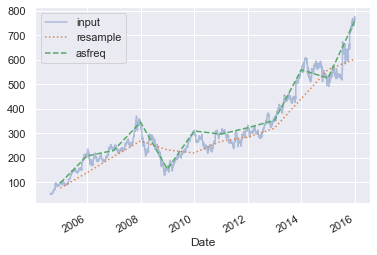

In [16]:
#using the resampling data aggregation and asfreq() data selection;
#we'd  resample the data at the end of the business year;

goog.plot(alpha=0.4, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

* the plot above shows the asfreq() and resample() methods,
see that the resample plot on the graph shows the yearly BUSINESS YEAR END ("BA") mean/average point, and the asfreq plot shows the actual value at the end of the business year.

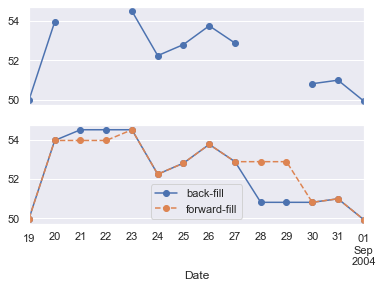

In [24]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker= 'o') #directs to the 1st plot/graph

data.asfreq('D', method='bfill').plot(ax=ax[1],style ='-o')
#second plot/graph
data.asfreq('D', method='ffill').plot(ax=ax[1],style ='--o')
ax[1].legend(["back-fill", "forward-fill"]);

* from the graph above, i think this take the loc points because it doesnt cut off the last figure "10". The places not filled in the top graph represent non-business days. or weekends.

In [25]:
goog.head(10)

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Name: Close, dtype: float64

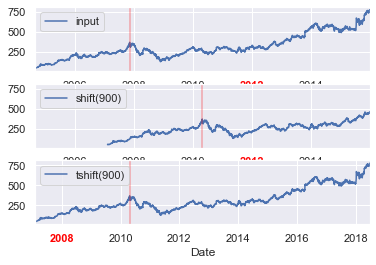

In [28]:
fig, ax = plt.subplots(3, sharey= True)
#apply a frequency to the data
goog = goog.asfreq('D', method = 'pad')

goog.plot(ax=ax[0])#first plot
goog.shift(900).plot(ax=ax[1]) #shift the data in the second plot by 900 days
goog.tshift(900).plot(ax=ax[2]) #shift the index by 900 days in the third plot.

#legends and connotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color = 'red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

#how can i make my graph bigger?

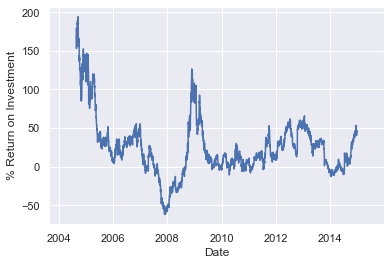

In [35]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
#this shows us the overall trend in the google stock and how the time with the
#highest ROI was right after its IPO, in the middle of the 2009 recession

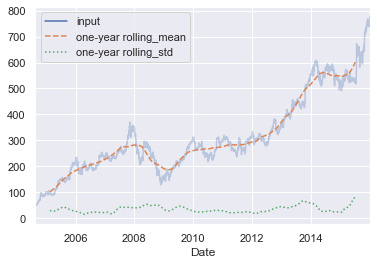

In [36]:
#one-year centered rolling mean and standard deviation of the Google stock prices

rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


In [39]:
b_data= pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", 
                    index_col='Date',parse_dates = True)

b_data.columns=['Total', 'East', 'West']

b_data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [40]:
b_data.columns=['Total', 'East', 'West']

In [41]:
seaborn.set?